In [ ]:
# Data Dummy

players = {
    "Wojciech Szczesny": {
        "GoalKeeping": "ya",  "Defending": "tidak", "Endurance": "tidak",
        "Dribbling": "tidak", "Crossing":  "tidak", "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Inigo Martinez": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "tidak",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Pau Cubarsi": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "tidak",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Alejandro Balde": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "ya",
        "Dribbling":  "ya",  "Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Jules Kounde": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    },
    "Pedri Gonzalez": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "ya",  "Shooting":  "tidak"
    },
    "Frenkie de Jong": {
        "GoalKeeping": "tidak","Defending": "ya",   "Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "ya",  "Shooting":  "tidak"
    },
    "Dani Olmo": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "ya",  "Shooting":  "ya"
    },
    "Lamine Yamal": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "ya",  "Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "ya"
    },
    "Raphinha": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "ya",  "Crossing":  "ya",   "Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "ya"
    },
    "Robert Lewandowski": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "ya",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "ya",
        "Passing":    "tidak","Shooting":  "ya"
    },
    "Ivan Cahya Aryasuta": {
        "GoalKeeping": "tidak","Defending": "tidak","Endurance": "tidak",
        "Dribbling":  "tidak","Crossing":  "tidak","Avg":       "tidak",
        "Passing":    "tidak","Shooting":  "tidak"
    }
}

In [ ]:
#Decison Tree

def predict_position(attr: dict) -> str:
    if attr["GoalKeeping"] == "ya":
        return "GK"
    elif attr["Defending"] == "ya":
        if attr["Endurance"]  =="ya":
            if attr ["Crossing"] == "ya":
                return "LB/RB"
            elif attr["Avg"] == "ya" and attr["Passing"] == "ya":
                return "CDM"
            else:
                return "CB"
        return "CB"
    elif attr["Avg"] == "ya":
        if attr["Passing"] == "ya":
            if attr["Shooting"] == "ya":
                return "CAM"
            elif attr["Defending"] == "ya":
                return "CDM"
            return "CMF"
        return "CF"
    elif attr["Dribbling"] == "ya" and attr["Crossing"] == "ya":
        return "RWF/LWF"
    else:
        return "unknown"

In [ ]:
#Prediksi Posisi Setiap Pemain

for name, stats in players.items():
    print(f"{name:20s}: {predict_position(stats)}")

Wojciech Szczesny   : GK
Inigo Martinez      : CB
Pau Cubarsi         : CB
Alejandro Balde     : LB/RB
Jules Kounde        : LB/RB
Pedri Gonzalez      : CMF
Frenkie de Jong     : CDM
Dani Olmo           : CAM
Lamine Yamal        : RWF/LWF
Raphinha            : RWF/LWF
Robert Lewandowski  : CF
Ivan Cahya Aryasuta : unknown


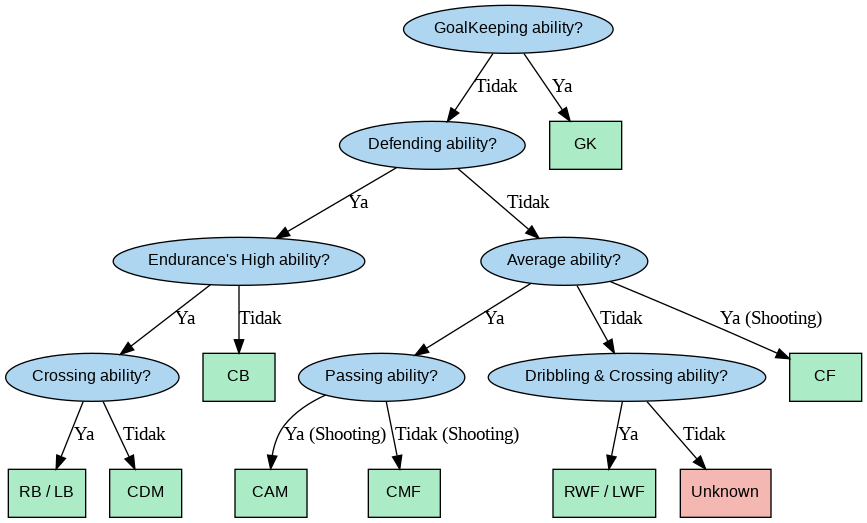

In [ ]:
#Visualisasi Tree

from graphviz import Digraph
from IPython.display import Image, display

dot = Digraph("PosisiPemainTree", format="png")
dot.attr(rankdir="TB", size="10,10")
dot.attr("node", style ='filled', fontname='Arial', fontsize='12', color='black')

warna_atribut= "#AED6F1"
warna_keputusan= "#ABEBC6"
warna_tidak_diketahui= "#F5B7B1"

dot.node("A", "GoalKeeping ability?", fillcolor=warna_atribut)
dot.node("C", "Defending ability?", fillcolor=warna_atribut)
dot.node("D", "Endurance's High ability?", fillcolor=warna_atribut)
dot.node("F", "Crossing ability?", fillcolor=warna_atribut)
dot.node("I", "Average ability?", fillcolor=warna_atribut)
dot.node("J", "Passing ability?", fillcolor=warna_atribut)
dot.node("N", "Dribbling & Crossing ability?", fillcolor=warna_atribut)

dot.node("B", "GK", fillcolor=warna_keputusan, shape="box")
dot.node("E", "CB", fillcolor=warna_keputusan, shape="box")
dot.node("G", "RB / LB", fillcolor=warna_keputusan, shape="box")
dot.node("H", "CDM", fillcolor=warna_keputusan, shape="box")
dot.node("K", "CAM", fillcolor=warna_keputusan, shape="box")
dot.node("L", "CMF", fillcolor=warna_keputusan, shape="box")
dot.node("M", "CF", fillcolor=warna_keputusan, shape="box")
dot.node("O", "RWF / LWF", fillcolor=warna_keputusan, shape="box")
dot.node("P", "Unknown", fillcolor=warna_tidak_diketahui, shape="box")

dot.edge("A", "B", label="Ya", taillabel=" ")
dot.edge("A", "C", label="Tidak", taillabel=" ")

dot.edge("C", "D", label="Ya", taillabel=" ")
dot.edge("C", "I", label="Tidak", taillabel=" ")

dot.edge("D", "F", label="Ya", taillabel=" ")
dot.edge("D", "E", label="Tidak", taillabel=" ")

dot.edge("F", "G", label="Ya", taillabel=" ")
dot.edge("F", "H", label="Tidak", taillabel=" ")

dot.edge("I", "J", label="Ya", taillabel=" ")
dot.edge("I", "N", label="Tidak", taillabel=" ")

dot.edge("J", "K", label="Ya (Shooting)", taillabel=" ")
dot.edge("J", "L", label="Tidak (Shooting)", taillabel=" ")

dot.edge("I", "M", label="Ya (Shooting)", taillabel=" ")

dot.edge("N", "O", label="Ya", taillabel=" ")
dot.edge("N", "P", label="Tidak", taillabel=" ")

img_bytes = dot.pipe(format='png')
display(Image(img_bytes))
